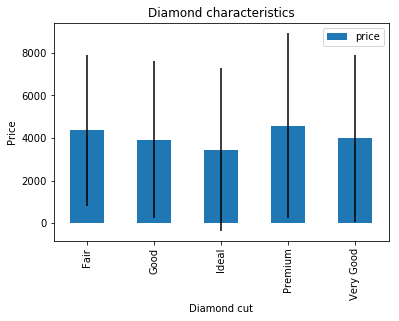

In [1]:
# Problem 1
import numpy as np
import pandas as pd
from pydataset import data
from matplotlib import pyplot as plt
diamonds = data("diamonds")
cut = diamonds.groupby('cut')
means = cut.mean()
errors = cut.std()
means.loc[:,["price"]].plot(kind="bar", yerr = errors, title="Diamond characteristics")
plt.xlabel('Diamond cut')
plt.ylabel('Price')
plt.show()

I created a bar plot showing the average price for each type of diamonds, based on their cuts. Understandoing the relationship between cut and price is important for diamond sellers, so that they could wisely choose what how well they should cut the diamonds. The plot shows that prices do not vary a lot with cuts.

In [2]:
# Problem 2
titanic = pd.read_csv('/Users/Sophia/Desktop/BootCamp2017/Computation/Wk2_VisPandas/titanic.csv')
titanic = titanic.dropna(how='all')
embark = titanic.groupby('Embarked')
print(embark['Survived'].mean())
print(titanic.pivot_table('Survived', index=['Embarked', 'Sex']))
print(titanic.pivot_table('Survived', index=['Embarked', 'Sex'], aggfunc = 'count'))
print(titanic.pivot_table('Survived', index=['Embarked', 'Sex'], columns = 'Pclass'))
age = pd.cut(titanic['Age'], [0,12,18,80])
print(titanic.pivot_table('Survived', index=['Embarked', 'Sex'], columns = age))

Embarked
C    0.555556
Q    0.357724
S    0.332604
Name: Survived, dtype: float64
                 Survived
Embarked Sex             
C        female  0.902655
         male    0.305732
Q        female  0.616667
         male    0.111111
S        female  0.680412
         male    0.170144
                 Survived
Embarked Sex             
C        female       113
         male         157
Q        female        60
         male          63
S        female       291
         male         623
Pclass                1.0       2.0       3.0
Embarked Sex                                 
C        female  0.971831  1.000000  0.709677
         male    0.400000  0.294118  0.214286
Q        female  1.000000  1.000000  0.589286
         male    0.000000  0.000000  0.122807
S        female  0.956522  0.870968  0.395349
         male    0.305556  0.134228  0.144809
Age               (0, 12]  (12, 18]  (18, 80]
Embarked Sex                                 
C        female  0.888889  0.800000  0.959

The tables show that people embarked from C had higher survival rate. This holds for both genders. Interesting, while both genders embarked from S had a higher survival rate than the groups embarked from Q, the overall survival rate for people embarked from Q was higher. This is because the female-male ratio in these two places are very different--since female were much more likely to survive, the high percentage of women embarked from Q pulled up the overall survival rate. The last two tables show that survival rates within the same class, or within the same age group, did not differ much according to places embarked.

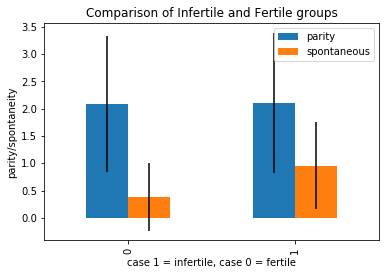

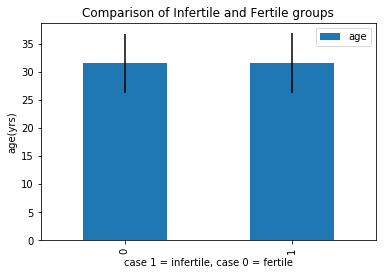

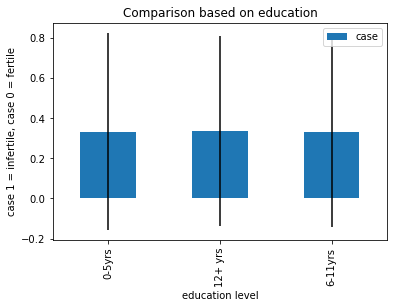

               case
education          
0-5yrs     0.333333
12+ yrs    0.336207
6-11yrs    0.333333
                      case
education parity          
0-5yrs    1       0.333333
          4       0.333333
          6       0.333333
12+ yrs   1       0.333333
          2       0.333333
          3       0.333333
          4       0.333333
          5       0.333333
          6       0.500000
6-11yrs   1       0.333333
          2       0.333333
          3       0.333333
          4       0.333333
          5       0.333333
spontaneous              0         1         2
education parity                              
0-5yrs    1       0.333333       NaN       NaN
          4       1.000000  0.000000  0.000000
          6       0.200000       NaN  1.000000
12+ yrs   1       0.161290  0.565217       NaN
          2       0.181818  0.142857  0.800000
          3       0.000000  0.250000  0.800000
          4       0.500000  0.000000       NaN
          5            NaN  0.000000  1.00000

In [3]:
# Problem 3
infert =  data("infert")
case = infert.groupby('case')
means = case.mean()
errors = case.std()

means.loc[:,["parity", "spontaneous"]].plot(kind="bar", yerr = errors, title="Comparison of Infertile and Fertile groups")
plt.xlabel('case 1 = infertile, case 0 = fertile')
plt.ylabel('parity/spontaneity')
plt.show()

means.loc[:,["age"]].plot(kind="bar", yerr = errors, title="Comparison of Infertile and Fertile groups")
plt.xlabel('case 1 = infertile, case 0 = fertile')
plt.ylabel('age(yrs)')
edu = infert.groupby('education')
plt.show()
means_1 = edu.mean()
errors_1 = edu.std()
means_1.loc[:,["case"]].plot(kind="bar", yerr = errors_1, title="Comparison based on education")
plt.ylabel('case 1 = infertile, case 0 = fertile')
plt.xlabel('education level')
plt.show()

print(infert.pivot_table('case', index=['education']))
print(infert.pivot_table('case', index=['education', 'parity']))
print(infert.pivot_table('case', index=['education', 'parity'], columns = 'spontaneous'))

I conduct analysis of the "infert.csv" data from the pydataset, which explores infertility after induced and spontaneous abortion. In the dataset, "case" indicates infertility, "induced" and "spontaneous" means induced, spontaneous abortion, respectively. Since the dataset is a matched case-control study, I expect all the variables to be well-balanced between the case and the control group.

The graphs and tables compare other varaibels for the case and the control groups. Inspection of them indicates that apart from the variable "spontaneous", all other characteristics are very well-balance between the case and the control gorups. The average of the "spontaneous" variable is close to one for the case group, whereas it is less than 0.5 for the control group.